# Summary

## 5 interpretation of PCA

- numerical interpretation:

    1. data variance/dimensionality reduction

    2. data representation

    3. data denoising

    4. low-rank matrix approximation

- probability/statistics interpretation:

    5. Gaussian covariance/probabilistic

## principal components are directions

PCA (principal component analysis) is one of the most used **unsupervised** learning methods

PCA finds components that are principal

PCA finds "interesting directions" of data

given data $X \in \mathbb{R}^{p \times n}$

where we have $n$ data points in $p$ dimensions ($p \geq k$)

- the **top k principal components** of $X$ is a matrix $\in \mathbb{R}^{p \times k}$, consists of **top k left singular vectors** of $X$

$$U_k$$

## k-D coordinates/loadings/embeddings/data representation

if we do dimensionality reduction

- the **lower-dimensional (k-D) coordinates** of data matrix $X$ is a matrix $\hat \alpha  \in \mathbb{R}^{k \times n}$ 

    also called **embedding** of data $X$

$$
\hat \alpha = U_k^T X = U_k^T (USV^T) = S_kV_k^T
$$


- the coordinates of ith data vector $\mathbf{x}_i$ is a column vector $\hat \alpha_i \in \mathbb{R}^k$, which is the ith column vector of matrix $\hat \alpha$

$$
\hat \alpha_i = U_k^T x_i = [S_kV_k^T]_{(:,i)}
$$


- the jth entry of coordinates $\hat \alpha_i$ of observ $\mathbf{x}_i$ is a scalar

$$
[\hat \alpha_i]_j = [S_kV_k^T]_{ji} = \sigma_j [V_k]_{ij}
$$

that is, jth singular value $\sigma_j$ multiplies the ith entry of jth right singular vector $[V_k]_{j(i)}$

## projected data/rank k reconstruction of data

if we do low-rank matrix approximation,

- the rank $k$ reconstruction of data matrix $X$ is a matrix $X_k \in \mathbb{R}^{p \times n}$ of **same shape** as original matrix

    also called **projected data**, the dimension is not change

$$
X_k = U_k \hat \alpha = U_k (U_k^T X) = U_k S_k V_k^T
$$



- the rank $k$ reconstruction of ith data vector $\mathbf{x}_i$ is a column vector $x_{i (k)} \in \mathbb{R}^{p}$

$$
x_{i (k)} = U_k \hat \alpha_i = U_k (U_k^T x_i) = U_k [S_k V_k^T]_{(:,i)}
$$

# 1st interpretation: data variance/dimensionality reduction

Norm-preserving projections: preserve **variance/size/energy** of data

- suppose we have feature $X \in \mathbb{R}^{p \times n}$ ($n \geq p$) with column vector $\mathbf{x}_i$

    **Note**: this is different from normal regression, where feature is $X \in \mathbb{R}^{n \times p}$ with column vector $\mathbf{x}_i^T$

    we want to find an orthogonal matrix $U  \in \mathbb{R}^{p \times k}$ that maximize the variance of $X$ in the column space $\mathcal{K}$ of $U$

$$
U = \underset{A|A^TA=I_p}{\arg \max} \left \| A^T X\right \|_F^2
= \underset{A|A^TA=I_p}{\arg \max} \sum_{i=1}^n \left \| A^T \mathbf{x}_i \right \|_2^2 
$$

where $\left \| A^T X\right \|_F^2$ is variance of data $X$, i.e. Frobenius norm of $A^T X$

This optimization is **non-convex**, but has a closed form solution using **SVD (singular value decomposition)**

## SVD (singular value decomposition)

- For any matrix $X \in \mathbb{R}^{p \times n} (n \geq p)$, $X$ can be decomposed as

$$
X = USV^T = \sum_{i=1}^{\text{rank}(X)}S_{(ii)}\mathbf{u}_i\mathbf{v}_i^T
$$

$$
\begin{align}
&p \times n = p \times p \cdot p \times n \cdot n \times n \\

\begin{bmatrix}
| & | &  &| \\ 
x_1 & x_2 & \cdots  &x_n \\ 
| & | &  & |
\end{bmatrix}
&=\begin{bmatrix}
| & | &  &| \\ 
\mathbf{u}_1 & u_2 & \cdots  &u_p \\ 
| & | &  & |
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 &0   & \cdots &0\\ 
0 & \sigma_2 & \cdots & 0 &0  &  \cdots &0\\ 
\vdots  & \vdots  & \ddots &  \vdots    &\vdots  &  &\vdots \\ 
0 & 0 & \cdots  & \sigma_p & 0  & \cdots  &0
\end{bmatrix}
\begin{bmatrix}
- & \mathbf{v}_1^T & -\\ 
- & v_2^T & -\\ 
 & \vdots & \\ 
- & v_n^T & -
\end{bmatrix}\\[1em]

&p \times n = p \times p \cdot p \times p \cdot p \times n \\

\begin{bmatrix}
| & | &  &| \\ 
x_1 & x_2 & \cdots  &x_n \\ 
| & | &  & |
\end{bmatrix}
&=\begin{bmatrix}
| & | &  &| \\ 
\mathbf{u}_1 & u_2 & \cdots  &u_p \\ 
| & | &  & |
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & \cdots & 0 \\ 
0 & \sigma_2 & \cdots & 0 \\ 
\vdots  & \vdots  & \ddots \\ 
0 & 0 & \cdots  & \sigma_p
\end{bmatrix}
\begin{bmatrix}
--- & \mathbf{v}_1^T & ---\\ 
--- & v_2^T & ---\\ 
 & \vdots  & \\ 
--- & v_p^T & ---
\end{bmatrix}
\end{align}
$$

2 formats

- $U \in \mathbb{R}^{p \times p}$ is always an orthogonal square matrix

format 1

- $S \in \mathbb{R}^{p \times n}$ is a rectangular diagonal matrix, with $p$ entries in diagonal $\geq 0$ in descending order, other entry are 0

- $V \in \mathbb{R}^{n \times n}$ is an orthogonal square matrix

format 2

- $S \in \mathbb{R}^{p \times p}$ is a square diagonal matrix

- $V \in \mathbb{R}^{p \times n}$ is a rectangular orthogonal matrix

- $\text{rank}(X) = l_1\ norm(S) =p$  

    = number of non-zeros entry of matrix $S$, 
    
    = number of singular values of $X$


- column vectors of matrix $U$ are **left singular vectors** of $X$

$$
\mathbf{u}_i
$$


- column vectors of matrix $V$ are **right singular vectors** of $X$ 

$$
\mathbf{v}_i
$$


- diagonal entries of matrix $S$ are **singular values** of $X$

    by convention: $S_{ii} \geq S_{jj}$ for $i \leq j$

$$\sigma_i = S_{ii}$$



- the **top-k singular vectors** are those corresponding to the $k$ **largest singular values**

    left singular vectors: $\mathbf{u}_1 \sim \mathbf{u}_k$ 
    
    right singular vectors: $\mathbf{v}_1 \sim \mathbf{v}_k$
    
    singular values: $\sigma_1 \sim \sigma_k = S_{11} \sim S_{kk}$


## solving

we want to find an orthogonal matrix $U  \in \mathbb{R}^{p \times k}$ that maximize the variance of $X$ in the column space $\mathcal{K}$ of $U$

$$
U = \underset{A|A^TA=I_p}{\arg \max}\left \| A^T X\right \|_F^2
$$

- solution is $U_k \in \mathbb{R}^{p \times k}$, $[U_k]_{(:,i)} = \mathbf{u}_i$

    the columns of matrix $U_k$ are the top k left singular vectors of matrix $X$

$$U = U_k$$


- The reduced dimension representation of data $x_i \in \mathbb{R}^p$ is

$$
\tilde \alpha_i = U_k^T x_i \in \mathbb{R}^k
$$

- in other words,  $\tilde \alpha_i$ are the coordinates to represent $\mathbf{x}_i$ in the space $\mathcal{K}$ spanned by $U_k$ ($\mathcal{K} = \text{colspace}(U_k)$)

- the projected data  of $\mathbf{x}_i$ onto space $\mathcal{K}$ is

$$
\tilde {\mathbf{x}}_i = U_k \tilde \alpha_i = U_k U_k^Tx_i  \in \mathbb{R}^p
$$

## variance decomposition

- Variance of data $X \in \mathbb{R}^{p\times n}$

$$
\left \| X\right \|_F^2 = \left \| USV^T\right \|_F^2  = \left \| S\right \|_F^2  = \sum_{i=1}^{\text{rank}(X)=p} \sigma_i^2
$$

- variance of data $X$ in the column space is **sum of square of top k singular value of $X$**

$$
\left \| A^T X\right \|_F^2 = \left \| A^T (USV^T)\right \|_F^2 = \left \| A^T US\right \|_F^2 
= \left \| U_k^T US\right \|_F^2   = \left \| S_k\right \|_F^2= \sum_{i = 1}^k \sigma_i^2
$$

- leftover variance (reconstruction error)

$$
\left \| X\right \|_F^2 - \left \| A^T X\right \|_F^2= \sum_{i=1}^{\text{rank}(X)} \sigma_i^2 - \sum_{i=1}^{k} \sigma_i^2 =  \sum_{i=k+1}^{\text{rank}(X)} \sigma_i^2 
$$

## Proof

if we can proof $\left \| A^T US\right \|_F^2$ is upper-bounded by the same quantity achieved by $A = U_k$, that is 

$$ \left \| A^T US\right \|_F^2 \leq \sum_{i = 1}^k \sigma_i^2$$

then we proof our guess is right

define $\tilde U = A^TU$,

$$
\left \| A^T US\right \|_F^2 = \left \| \tilde U S\right \|_F^2  = \sum_{i = 1}^p \sigma_i^2 \left \| \tilde {\mathbf{u}}_i \right \|_2^2
$$

where we take $\tilde {\mathbf{u}}_i = A^T\mathbf{u}_i$, $\mathbf{u}_i$ is the ith column of $U$

clearly, $l_2$ norm square of $\tilde {\mathbf{u}}_i$ is upper-bounded by 1 coz $\mathbf{u}_i$ is a unit vector

$$
\left \| \tilde {\mathbf{u}}_i \right \|_2^2  = \left \| A^T\mathbf{u}_i \right \|_2^2 \leq \left \| \mathbf{u}_i \right \|_2^2 = 1
$$

Thus, 

$$
\left \| A^T US\right \|_F^2 = \sum_{i = 1}^k \sigma_i^2 \left \| \tilde {\mathbf{u}}_i \right \|_2^2 \leq \sum_{i = 1}^k \sigma_i^2
$$

we can also show that 

$$
\sum_i^k \left \| \mathbf{u}_i \right \|_2^2=k
$$

proof:

$$
\sum_i^k \left \| \mathbf{u}_i \right \|_2^2=\left \| \tilde U \right \|_F^2=\left \| A^TU \right \|_F^2=\left \| A \right \|_F^2= \sum_i^k \left \| [A]_{:i} \right \|_2^2=k
$$

where $A$ is orthogonal matrix, $[A]_{:i}$ is $i$ th column of $A$



# 2rd interpretation: data representation

- we want to represent data in a low-dimensional space

    coz we believe true signal lives in this space

    noise is just added non-sense

    this interpretation is directly connected to the 1st one

- the projected data $\tilde {\mathbf{x}}_i$ of $\mathbf{x}_i$ onto space $\mathcal{K}$  is:

$$
\tilde {\mathbf{x}}_i = U_k \tilde \alpha_i = U_k U_k^Tx_i 
$$

## graph illustration

PCA VS. Linear regression

- PCA: minimize reconstruction error; projection in $A$ direction

    find orthonormal matrix $U$ that maximize energy of data $\mathbf{x}_i$ on to space $\mathcal{K}$ ($l_2$ norm squared of $AA^T \mathbf{x}_i$) 

    is equivalent to find space $\mathcal{K}$ and projected data $\tilde {\mathbf{x}}_i$ that minimize reconstruction error (Euclidean distance between projected data $\tilde {\mathbf{x}}_i$ and real data $ x_i$) 

$$
U_k = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k}{\arg \max} \sum _{i=1}^n \left \| AA^Tx_i \right \|_2^2 
\Leftrightarrow \mathcal{K};\ \tilde {\mathbf{x}}_i=\underset{\mathcal{K};\ \tilde {\mathbf{x}}_i \in \mathcal{K}}{\arg \min}  \sum _{i=1}^n \left \| \tilde {\mathbf{x}}_i - \mathbf{x}_i \right \|_2^2
$$

- linear regression: minimize prediction error; projection in $y$ axis direction

    find $\hat y_i$ that minimize Euclidean distance between projected data $\hat y_i$ and real data $y_i$

$$
\hat y_i = \underset{\hat y_i }{\arg \min}\frac{1}{n}\sum_{i=1}^n (\hat y_i  - y_i)^2
$$

- $\tilde {\mathbf{x}}_i - \mathbf{x}_i$ is reconstruction error

- $\hat y_i - y_i$ is residual

## another form of optimization

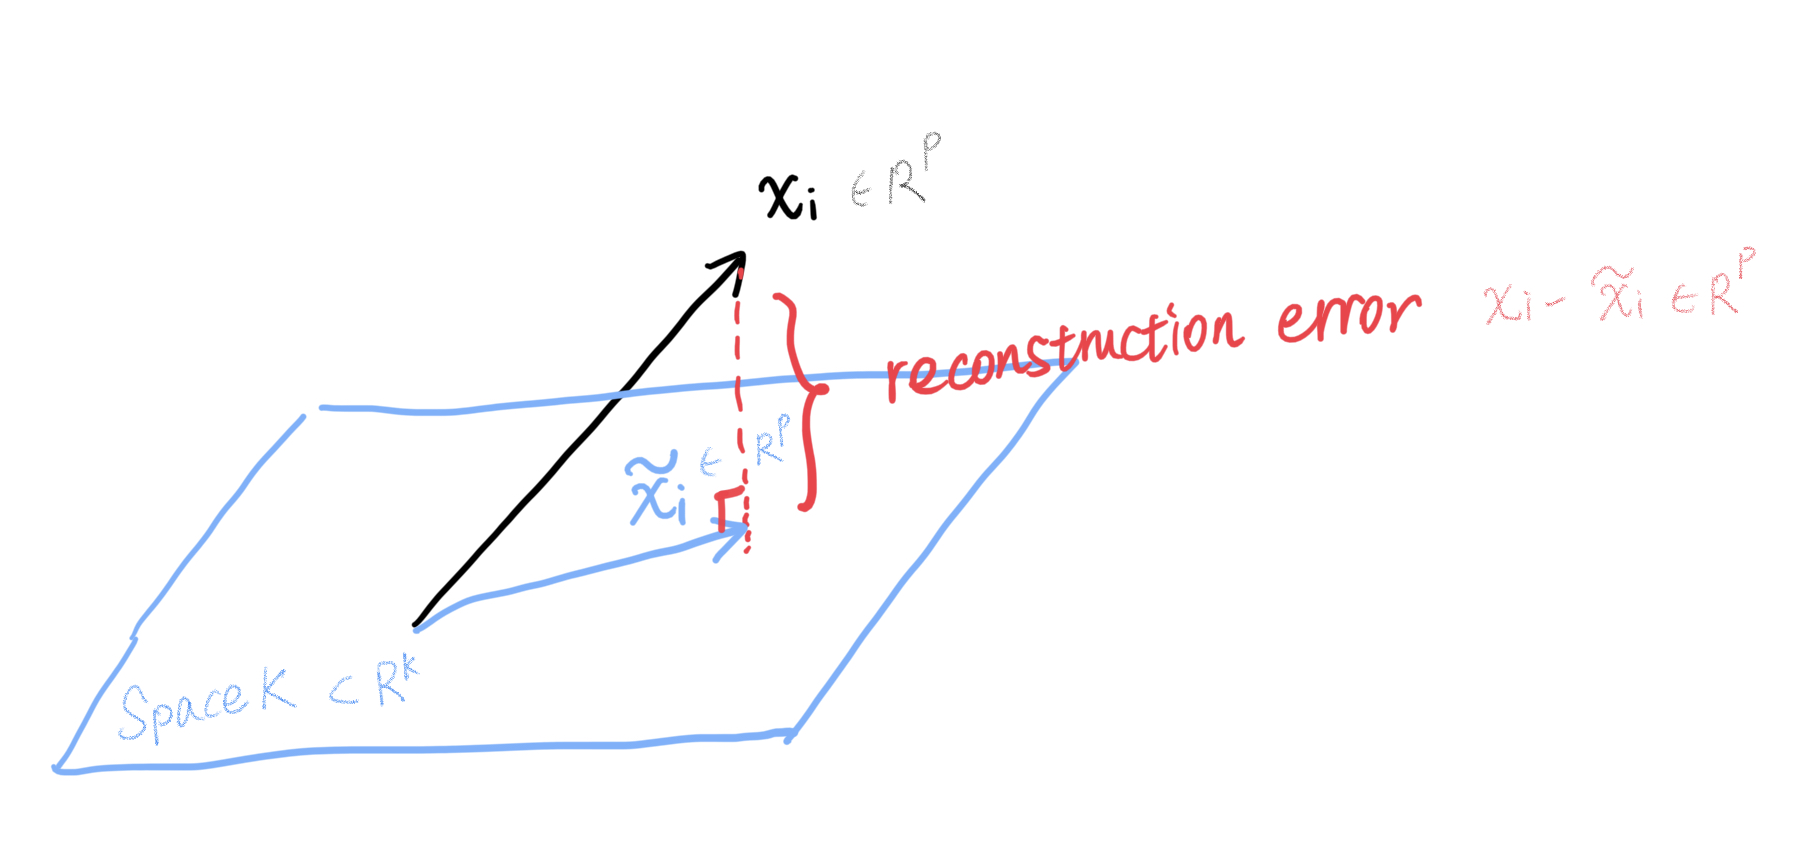

$$
\mathcal{K};\ \tilde {\mathbf{x}}_i=\underset{\mathcal{K};\ \tilde {\mathbf{x}}_i \in \mathcal{K}}{\arg \min}  \sum _{i=1}^n \left \| \tilde {\mathbf{x}}_i - \mathbf{x}_i \right \|_2^2
$$

Plug in $\tilde {\mathbf{x}}_i = A \tilde \alpha_i = A A^T \mathbf{x}_i $

then optimize over $\mathcal{K}$ and $\tilde {\mathbf{x}}_i$ change to optimize over $A$

$$
U_k = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k}{\arg \min} \sum _{i=1}^n \left \|  \mathbf{x}_i -A A^T \mathbf{x}_i\right \|_2^2
$$

so we want to find the orthogonal $k$ dimensional projection that minimizes the error between $\tilde {\mathbf{x}}_i$ and $\mathbf{x}_i$

based on Pythagorean Theorem 勾股定理

$$
\left \|\mathbf{x}_i-A A^T \mathbf{x}_i \right \|_2^2 = \left \| \mathbf{x}_i \right \|_2^2  - \left \| AA^T \mathbf{x}_i\right \|_2^2  = \left \| \mathbf{x}_i \right \|_2^2  - \left \| A(A^T \mathbf{x}_i)\right \|_2^2 = \left \| \mathbf{x}_i \right \|_2^2  - \left \| A^T \mathbf{x}_i\right \|_2^2
$$

Thus, 

$$
U_k = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k}{\arg \min} \sum _{i=1}^n \left \| \mathbf{x}_i-A A^T \mathbf{x}_i \right \|_2^2 = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k}{\arg \min} \sum _{i=1}^n \left( \left \| \mathbf{x}_i \right \|_2^2  - \left \| A^T \mathbf{x}_i\right \|_2^2 \right)
$$

Since $\mathbf{x}_i$ is independent of $A$, then the optimization above equivalent to the 1st interpretation

$$
U = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k}{\arg \max} \sum_{i=1}^n \left \| A^T \mathbf{x}_i \right \|_2^2 
$$

# 3rd interpretation: data-denoising

https://www.cs.cmu.edu/~mgormley/courses/10701-f16/slides/lecture14-pca.pdf

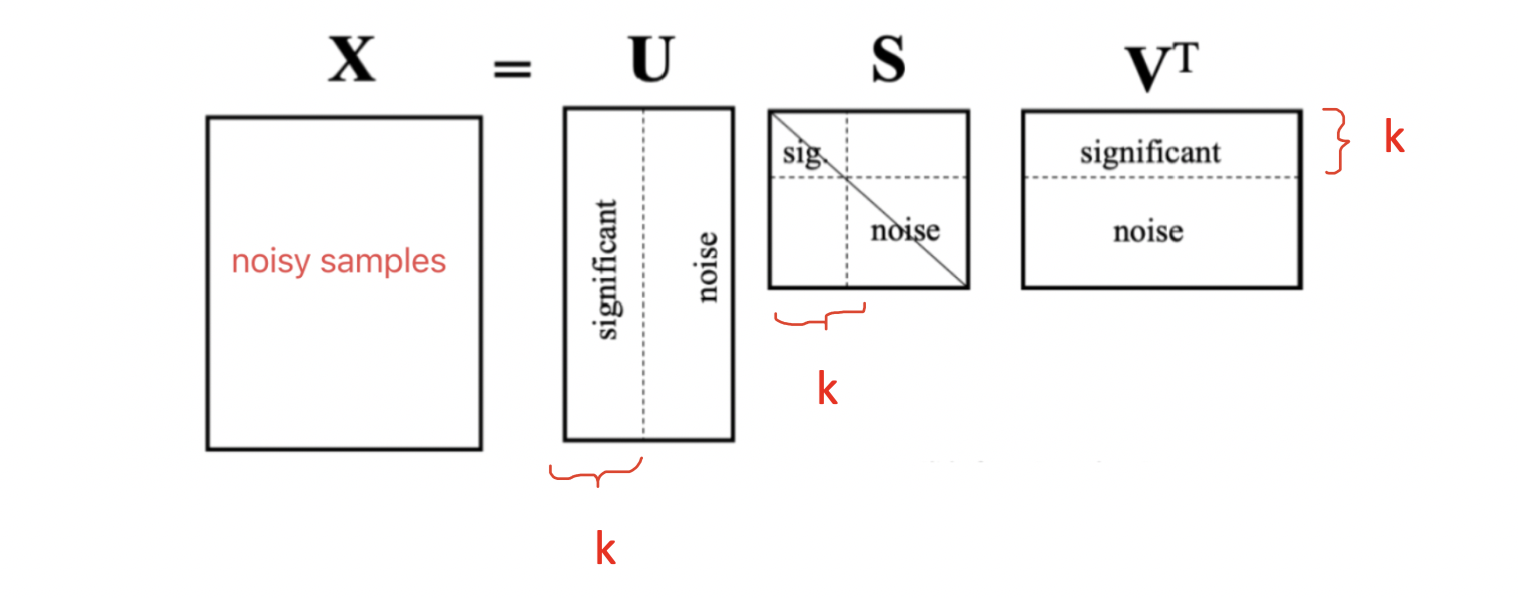

- this interpreation data-denoising is also very connected to the 2rd interpretation

- suppose we have a probabilistic model

$$
\mathbf{x}_i = \mathbf{z}_i + \mathbf{w}_i
$$
 
where $\mathbf{x}_i \in \mathbb{R}^p$ is observed data point

$\mathbf{z}_i \in \mathbb{R}^p$ is true data point, $\mathbf{z}_i \in \mathcal{K}$ , $\mathcal{K}$ is an unknown k-dimensional space

$\mathbf{w}_i \in \mathbb{R}^p$ is **Gaussian noise** $\mathbf{w}_i \sim N(\mathbf{0}, \sigma^2I_p)$

- we can show that maximum likelihood estimate of $\mathbf{z}_i$ is projection of $\mathbf{x}_i$ onto space $\mathcal{K}$, so we need to reduce noise and find the optimal $\mathcal{K}$

- recall the 2rd interpretation:

    we optimize over $\mathcal{K}$ and $\tilde {\mathbf{x}}_i$

$$
\mathcal{K}; \tilde {\mathbf{x}}_i=\underset{\mathcal{K}; \tilde {\mathbf{x}}_i \in \mathcal{K}} {\arg \min} \sum _{i=1}^n \left \| \mathbf{x}_i -\tilde {\mathbf{x}}_i \right \|_2^2
$$


- Now we have similar optimization framework: optimize over $\mathcal{K}$ and $\mathbf{z}_i$

$$
\mathcal{K};\ \mathbf{z}_i = \underset{\mathcal{K};\ \mathbf{z}_i \in \mathcal{K}} {\arg \min} \sum _{i=1}^n \left \| \mathbf{x}_i - \mathbf{z}_i\right \|_2^2
$$


- recall 2rd interpretation, the projected data $\tilde {\mathbf{x}}_i$ of $\mathbf{x}_i$ onto space $\mathcal{K}$  is:

$$
\tilde {\mathbf{x}}_i = U_k \tilde \alpha_i = U_k U_k^T \mathbf{x}_i 
$$

- Now let $A \in \mathbb{R}^{p \times k}$ be an orthogonal projection matrix and span the space $\mathcal{K}$

    let projected data $z_i = A\alpha_i$ 

    Plug in $z_i = A\alpha_i$ to $\mathcal{K};\ \mathbf{z}_i = \underset{\mathcal{K};\ \mathbf{z}_i \in \mathcal{K}} {\arg \min} \sum _{i=1}^n \left \| \mathbf{x}_i - \mathbf{z}_i\right \|_2^2$ 

    now we are optimize over $A$ and $\alpha_i$ 

$$
U, \alpha_i = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k;\ \alpha_i \in \mathbb{R}^k}{\arg \min} \sum _{i=1}^n \left \|  \mathbf{x}_i - A\alpha_i\right \|_2^2
$$

$$
\begin{align}
\left \| A\alpha_i - \mathbf{x}_i \right \|_2^2 
&=  \left \| A\alpha_i - AA^T\mathbf{x}_i -  (I-AA^T)\mathbf{x}_i \right \|_2^2\\[1em]
&= \left \| A\alpha_i - AA^T\mathbf{x}_i  \right \|_2^2+ \left \| (I-AA^T)\mathbf{x}_i \right \|_2^2\\[1em] 
&= \left \| \alpha_i - A^T\mathbf{x}_i  \right \|_2^2+\left \| (I-AA^T)\mathbf{x}_i \right \|_2^2\\[1em] 
(\text{A is orthogornal and } \alpha_i = A^T\mathbf{x}_i) &=\left \| \alpha_i - \alpha_i  \right \|_2^2+\left \| (I-AA^T)\mathbf{x}_i \right \|_2^2\\[1em] 
&=\left \| (I-AA^T)\mathbf{x}_i \right \|_2^2\\[1em]
\end{align}
$$

- since $\left \| (I-AA^T)\mathbf{x}_i \right \|_2^2$ is independent of $\alpha_i$,

    then we just optimize over $A$:

$$
U= \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k} {\arg \min} \sum_{i=1}^n \left \| (I-AA^T)\mathbf{x}_i \right \|_2^2 = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k} {\arg \min} \sum_{i=1}^n  \left \| \mathbf{x}_i-AA^T\mathbf{x}_i \right \|_2^2 
$$

this is same as 2rd interpretation

- in other words, we optimize over projection $P_\mathcal{K}$ to minimize reconstruction error

$$
P_\mathcal{K} = \underset{P_\mathcal{K}}{\arg \min} \sum _{i=1}^n \left \|  \mathbf{x}_i - P_\mathcal{K} \mathbf{x}_i\right \|_2^2 \in \mathbb{R}^{p \times p}
$$

solution is 

$$
P_\mathcal{K} = U_k U_k^T
$$

## hyperparameter k

methods:

1. draw Scree plot (singular values of data $X$ VS. No. singular values or explained variance VS. No. principal components)

    by eyeballing, this method is subjective 
    
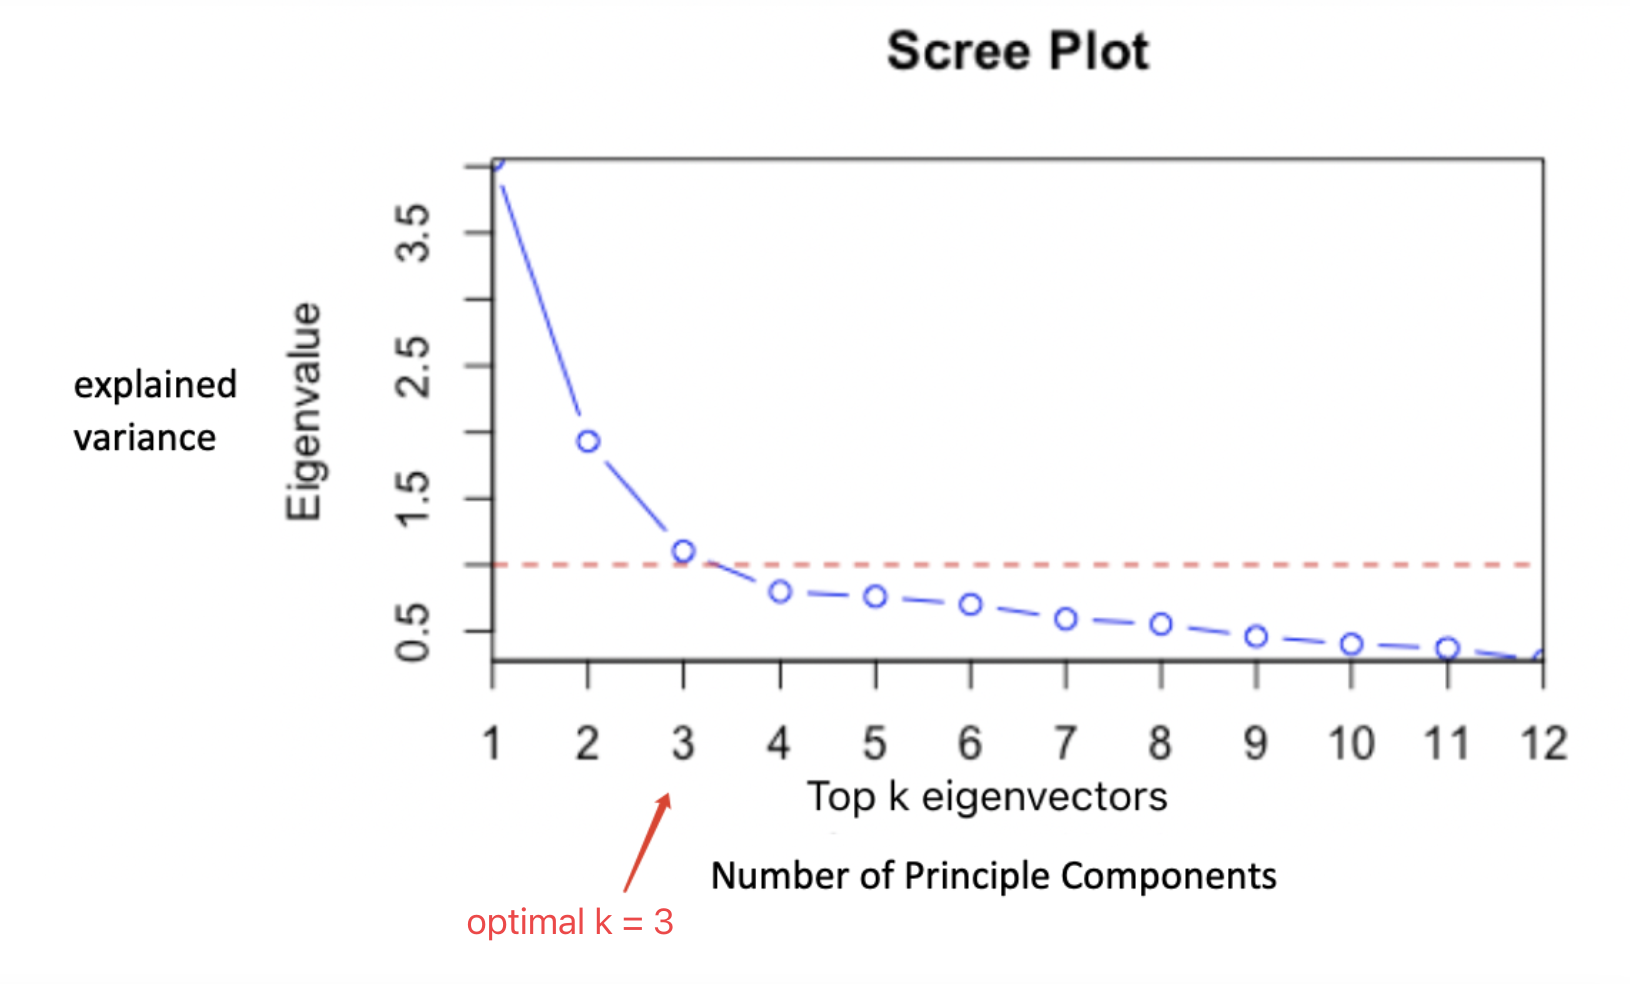

2. based on intuition of what level noise is on, 

    any singular value $\leq$ threshold might attribute to noise, so just set these singular values to be 0


- Note: can't use cross-validation to pick $k$ with smallest reconstrunction error

    coz as $k$ ↑, construction error always ↓

# 4th interpretation: low-rank matrix approximation

- original data $X$ are high-rank matrix, $\text{rank}(X)=p$, $p$ is number of singular values

    while true data are low-rank matrix (rank = k), 
    
    other parts in original data are just noise

## movitation

recommendation system

in 2014, Netflix released a dataset for competition,

let public design a movie recommendataion system

the winner used low-rank matrix interpretation as workhorse

## rating matrix, object matrix, user matrix

objects (item): movies (Netflix), books (Amazon), users (Linkdin)

certain movies are similar, also certanin users are similar

use this info we can make recommendations, similar to classification


- **rating matrix** $X \in \mathbb{R}^{d_1 \times d_2}$

    we have $d_1$ users and $d_2$ movies

    entry $X_{(ij)}$ is user i's rating for object j

    rating could be like/dislike (0/1) or score (1-5), the former is better

    some entry could be missing, e.g., some user didn't rate some movies, this may not effect accuracy of recommendation coz this missing info might be redundant 

    we could also use less robust methods to impute them: clustering (take average of ratings of similar movies as missing value)


- **object matrix** $M \in \mathbb{R}^{d_2 \times k}$

    jth row is feature of object j: $\mathbf{m}_j \in \mathbb{R}^k$, e.g., types, director, star


- **user matrix** $A \in \mathbb{R}^{d_1 \times k}$

    i th row is feature of user i: $\mathbf{a}_i \in \mathbb{R}^k$, e.g., age, gender, income

## linear model

-  linear model

$$
X \approx AM^T
$$

- for user i, we have coefficient vector $a_i$ such that

$$
X_{(ij)} \approx \left \langle \mathbf{a}_i, \mathbf{m}_j \right \rangle = \mathbf{a}_i^T \mathbf{m}_j 
$$

the inner product of user's feature vector and object's feature vector represent how similar objects are

we use $\approx $ coz in reality there are noisy and missing entries

- training: learn $\hat a_i$ by minimizing reconstruction error

- predicting: recommend an unobserved movie $l$ for user $i$ with the highest predicted ratings

$$
l = \arg \max_l \hat X_{(i,l)} = \arg \max_l \hat {\mathbf{a}}_j^T \mathbf{m}_l
$$

## learn latent k dimensional subspace of features

- learn latent k dimensional subspace of features

- if we don't Know these features (p>=k), we can learn them

- suppose we have linear model 

    where $W$ is some noise term with bounded Frobenius norm, often take $W$ as Gaussian

$$
X=AM^T + W
$$

- assume we observed all entries, consider this optimization

$$
U, M = \underset{A \in \mathbb{R}^{d_1 \times k}|A^TA=I_k, M \in \mathbb{R}^{d_2 \times k}}{\arg \min} \left \| AM^T - X \right \|_F^2
$$

$\left \| AM^T - X \right \|_F^2$ is Frobenius norm of least square


Note that $AM^T  \in \mathbb{R}^{d_1 \times d_2}$ is always a rank k matrix

- solution is exactly the SVD of $X$

$$
A = U_k, M=V_k S_k
$$

## connection to 3rd interpretation

- in the 3rd interpretation-data denoising, optimize over $A$ and $\alpha_i$ 

$$
U, \alpha_i = \underset{A \in \mathbb{R}^{p \times k}|A^TA=I_k; \alpha_i \in \mathbb{R}^k}{\arg \min} \sum _{i=1}^n \left \| A\alpha_i - \mathbf{x}_i \right \|_2^2
$$

- in the 4th interpretation-low rank matrix, optimize over $A$ and $\mathbf{m}_i$, the role of $\alpha_i$ is played by $\mathbf{m}_i$
    
    other things is exactly the same

$$
U,  m_i=\underset{A \in \mathbb{R}^{d_1 \times k}|A^TA=I, \mathbf{m}_i \in \mathbb{R}^{k}}{\arg \min}\sum_{i=1}^n\left \| A m_i - \mathbf{x}_i \right \|_2^2
$$

$$
\left\{\begin{matrix}
\alpha_i(\mathbf{m}_i): & \text{feature of object i}\\ 
\mathbf{x}_i: & \text{observed rating for object i}\\ 
A\alpha_i: & \text{predicted rating for object i}
\end{matrix}\right.
$$

## in general

suppose we have a matrix $X \in \mathbb{R}^{d_1 \times d_2}$

we want to find a low-rank matrix approximation of $X$

$$
\hat Y_k = \underset{Y|rank(Y) \leq k}{\arg \min}\left \| Y-X \right \|_F^2 
$$

solution is 

$$
\hat Y_k = U_k S_k V_k^T
$$

i.e., $\hat Y_k = AM^T, A = U_k, M= V_k S_k $

Note, because square diagonal matrix is symmetric 

$$S_k = S_k^T$$

# 5th interpretation: Gaussian covariance/probabilistic

- PCA for data generated from a Gaussian model is find the top k **eigenvectors of covariance matrix** $\Sigma$

- PCA for general data, find top k eigenvectors of **sample covariance matrix** (with or without re-centering)

- For big data, the fastest solution is compute **covariance matrix** bc only need to know the left singular vectors

## 2D graph illustration

- suppose data $X \in \mathbb{R}^{2 \times n}$ from a Gaussian distribution

    sample covariance matrix of $X$ is $\Sigma = XX^T$ 

    probability density function of $X$ is

$$
f(X) = \frac{1}{2 \pi [\text{det}(\Sigma)]^{\frac{1}{2}}}\exp\left ( -\frac{X^T \Sigma ^{-1}X}{2} \right )
$$

1. $\Sigma = I_2$  a circle: every direction along radius has the largest change of variation

$$
\Sigma = \begin{bmatrix}
1 & 0\\ 
0 & 1
\end{bmatrix}
$$


2. $\Sigma \neq I_2$  an ellipse

- align with axis: direction $x_1 = \begin{bmatrix}2 \\0\end{bmatrix}$ has the largest change of variation

$$
\Sigma = \begin{bmatrix}
2 & 0\\ 
0 & 1
\end{bmatrix}
$$

- don't align with axis

    rotate data to be $\tilde X = UX$, then sample covariance matrix $\Sigma = \tilde X \tilde X^T$ 

    the eigendecomposition of $\Sigma$ is 

$$
\mathbb{E}(\Sigma) = \mathbb{E}\left ( \tilde X \tilde X ^T\right ) = U \Sigma' U^T
$$

where $\Sigma'$ is another diagonal matrix

## eigen-decomposition (ED)

- suppose we have data: a Gaussian random vector $\mathbf{x} \in \mathbb{R}^{p} \sim N(\mathbf{0}, \Sigma)$

    mean is $\mathbf{0} \in \mathbb{R}^{p}$, often before PCA, we normalize column by removing mean of column

    $\Sigma = \mathbf{x}\mathbf{x}^T \in \mathbb{R}^{p \times p}$ is covariance matrix


- since $\Sigma$ is a covariance matrix, it is **symmetric and positive semi-definite**

    thus it has an eigen-decomposition (ED)

$$
\Sigma = UDU^T
$$

where $D  \in \mathbb{R}^{p \times p}$ is a square diagonal matrix with positive entries 

ith diagonal entry of $D$ $D_{ii}$ are **eigenvalues** of $\Sigma$ with descending order

$U \in \mathbb{R}^{p \times p}$ is a square orthogonal matrix, $U^TU = UU^T=I_p$

columns of $U$ are **eigenvectors** of $\Sigma$ corresponding to eigenvalues

- Note: for a symmetric and positive semi-definite matrix, **singular value decomposition = eigen-decomposition**


## 1-D projection

when k = 1, we want to find a unit vector $\mathbf{v} \in \mathbb{R}^{p}$ that maximizes variance of data in direction of $\mathbf{v}$

$$
\hat{\mathbf{v}} = \underset{\mathbf{v}| \left \| \mathbf{v} \right \|=1}{\arg \max}\mathbb{E}[ (\mathbf{v}^T \mathbf{x})^2 ]= \arg \max_{\mathbf{v}| \left \| \mathbf{v} \right \|=1} \mathbf{v}^T \Sigma \mathbf{v}
$$

optimal $\hat{\mathbf{v}}$ is the first column of matrix $U$, i.e., the first eigenvector of $\Sigma$

$$
\hat{\mathbf{v}} = \mathbf{u}_1
$$

proof:

$
\mathbb{E}[ (\mathbf{v}^T x)^2 ]= \mathbf{v}^T \Sigma \mathbf{v} = \mathbf{v}^T \left( \sum_{i=1}^p D_{ii}\mathbf{u}_i\mathbf{u}_i^T \right) \mathbf{v} =  \sum_{i=1}^p D_{ii} (\mathbf{v}^T \mathbf{u}_i)^2
$

where $D_{ii}$ is the ith diagonal entry of covariance matrix $\Sigma$ = the ith eigenvalue, $D_{11} > ... > D_{ii} >...> D_{pp}$

since $\mathbf{v}_i$ and $\mathbf{u}_i$ are both unit vectors, then $0 \leq (\mathbf{v}^T \mathbf{u}_i)^2 \leq 1$

thus

$$
\mathbb{E}[ (\mathbf{v}^T \mathbf{x})^2 ] \leq D_{11} (\mathbf{u}_1^T \mathbf{u}_1)^2
$$

## in general

generalize to k-dimensional projections, optimize over k-D space $\mathcal{K}$ to maximize expected variance

$$
\mathcal{K} = \underset{\mathcal{K}}{\arg\max} \mathbb{E}\left ( \left \| P_{\mathcal{K}} \mathbf{x} \right \|_2^2 \right )
$$

where $P_{\mathcal{K}} \in \mathbb{R}^{p \times k}$ is an orthogonal projection matrix onto space $\mathcal{K}$ with highest Gaussian variance

$
\begin{align}
\mathbb{E}\left ( \left \| P_{\mathcal{K}} \mathbf{x} \right \|_2^2 \right )
&=  \mathbb{E} \left ( \mathbf{x}^T P_{\mathcal{K}}^TP_{\mathcal{K}}\mathbf{x}\right ) \\[1em]
&=\mathbb{E} \left [ tr\left ( P_{\mathcal{K}}^T P_{\mathcal{K}} \mathbf{x}\mathbf{x}^T \right ) \right ] \\[1em]
&= \mathbb{E}\left [ tr\left ( P_{\mathcal{K}} \mathbf{x} \mathbf{x}^T P_{\mathcal{K}}^T\right ) \right ]  \\[1em]
&= tr\left ( P_{\mathcal{K}} \mathbf{x} \mathbf{x}^T P_{\mathcal{K}}^T\right ) \\[1em]
&=tr\left ( P_{\mathcal{K}}\Sigma P_{\mathcal{K}}^T \right ) \\[1em]
\end{align}
$

since $P_{\mathcal{K}} = AA^T$, now we change to optimize over orthogonal matrix $A$

$$
\mathcal{K} = \underset{\mathcal{K}}{\arg\max} \mathbb{E}\left ( \left \| P_{\mathcal{K}} x \right \|_2^2 \right ) \Leftrightarrow U= \underset{A\in \mathbb{R}^{p \times k} | A^TA=I_k}{\arg \max} tr\left ( AA^T\Sigma A^TA \right )
$$

**optimal solution is the top k eigen vectors of $\Sigma$**

$$
U = U_k
$$


proof:

Since $\Sigma = UDU^T$, $\left \| AB \right \|_F^2 = \left \| B \right \|_F^2$ if $A$ is an orthogonal matrix

$$
\begin{align}
tr\left ( AA^T\Sigma A^TA \right ) 
&= tr\left [  AA^T(UDU^T) A^TA \right ] \\[1em]
&= tr\left [  AA^T(UD^{\frac{1}{2}}D^{\frac{1}{2}}U^T) A^TA \right ] \\[1em]
&= tr\left [ (AA^TUD^{\frac{1}{2}})(D^{\frac{1}{2}}U^T A^TA) \right ] \\[1em]
&= tr\left ( \left \| AA^TUD^{\frac{1}{2}} \right \|_F^2 \right )\\[1em]
&= tr\left ( \left \| A^TUD^{\frac{1}{2}} \right \|_F^2 \right )\\[1em]
& \text{same  as 1st interpretation - data variance} 
\end{align}
$$

### empirical average of variance

if we don't know covariance matrix $\Sigma$ of data, rather than maximize expected variance

we can maximize **empirical averages variance** instead, this is exactly the 1st interpretation

$$
\mathbf{v} = \underset{\mathbf{v}| \left \| \mathbf{v} \right \|=1}{\arg \max}\ \mathbb{E} [ (\mathbf{v}^T\mathbf{x})^2 ] \Rightarrow \underset{\mathbf{v}| \left \| \mathbf{v} \right \|=1}{\arg \max}\ \frac{1}{n} \sum_{i=1}^n (\mathbf{v}^T\mathbf{x}_i)^2 
$$

rewrite it as form of **empirical covariance matrix** $\hat \Sigma$

$$
\mathbf{v} = \underset{\mathbf{v}| \left \| \mathbf{v} \right \|=1}{\arg \max} \frac{1}{n} \sum_{i=1}^n (\mathbf{v}^T\mathbf{x}_i \mathbf{x}_i^T \mathbf{v}) = \underset{\mathbf{v}| \left \| \mathbf{v} \right \|=1}{\arg \max} \ \mathbf{v}^T \hat \Sigma \mathbf{v}
$$

more generally, write as form of k-D orthogonal projections

$$
\mathcal{K} = \underset{\mathcal{K}}{\arg \max}\ \mathbb{E}\left ( \left \| P_{\mathcal{K}} \mathbf{x} \right \|_2^2 \right ) \Rightarrow \underset{\mathcal{K}}{\arg \max}\ \frac{1}{n}\sum _{i=1}^n\left \| P_{\mathcal{K}} \mathbf{x}_i \right \|_2^2
$$


## construct SVD from eigenvectors

- above show how to compute PCA using eigenvectors from sample covariance matrix

    we can use that motivation to construct SVD



suppose we have a matrix $X \in \mathbb{R}^{p \times n}$

let $Y=XX^T \in \mathbb{R}^{p \times p}$, clearly, $Y  \in \mathbb{R}^{p \times p}$ is a positive semi-definite and symmetric matrix

thus, $Y$ has a eigen-decomposition

$$
Y = UDU^T
$$

we can show that for an appropriate orthogonal matrix $V = X^TUD^{\frac{1}{2}}$

$$
X = USV^T=UD^{\frac{1}{2}}V^T
$$

we deal with the case $p \leq n$ and $X$ has rank $p$, so $Y$ has rank $p$ as well, so $D_{ii} > 0$ for all i.

diagonal matrix $S=D^{\frac{1}{2}}$, where its ith diagonal entry is square root of ith diagonal entry of $D$: $S_{ii} = \sqrt{D_{ii}}$

the general case is a simple extension using projections

## spiked PCA

- covariance matrix of data is spiked with $\mathbf{v}\mathbf{v}^T$. 

    by adding $\mathbf{v}\mathbf{v}^T$, increase (spike) spectrum along the $\mathbf{v}\mathbf{v}^T$ direction

$$
\Sigma = \mathbf{v}\mathbf{v}^T + \sigma I_p\ \text{for } v \in \mathbb{R}^p
$$